# Data Understanding dan Data Preparation

In [ ]:
pip install --upgrade tensorflow==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 993.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 60.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator

In [ ]:
#import library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding & scaling
from sklearn.preprocessing import OneHotEncoder

#for train test splitting & Gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# for resampling
from imblearn.over_sampling import SMOTE

#random forest
from sklearn.ensemble import RandomForestClassifier

# ANN Struktur
import keras
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

## Membaca Dataset

In [ ]:
df=pd.read_excel('/content/Dataset for People for their Blood Glucose Level with their Superficial body feature readings. (1).xlsx')
df

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N
...,...,...,...,...,...,...,...,...,...,...
16964,9,83,87,127,90,96.842657,97,0,0,D
16965,9,83,79,117,80,97.869454,98,0,0,D
16966,9,73,82,116,93,96.766282,98,0,0,D
16967,9,74,86,128,91,98.941036,98,0,0,D


In [ ]:
df.head(15)

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N
5,66,100,72,133,89,98.351676,96,0,0,N
6,66,100,94,142,78,97.939410,96,0,0,N
7,66,100,77,140,83,97.787502,95,0,0,N
8,66,100,79,144,87,98.288617,97,0,0,N
9,9,80,78,118,96,98.007890,97,0,0,N


In [ ]:
# membaca dimensi data (nBaris & nKolom)
df.shape

(16969, 10)

In [ ]:
# membaca list variabel/kolom
df.columns

Index(['Age', 'Blood Glucose Level(BGL)', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2',
       'Sweating  (Y/N)', 'Shivering (Y/N)', 'Class'],
      dtype='object')

In [ ]:
# membaca tipe data dari setiap variabel/feature
df.dtypes

Age                           int64
Blood Glucose Level(BGL)      int64
Diastolic Blood Pressure      int64
Systolic Blood Pressure       int64
Heart Rate                    int64
Body Temperature            float64
SPO2                          int64
Sweating  (Y/N)               int64
Shivering (Y/N)               int64
Class                        object
dtype: object

In [ ]:
# membaca data secara statistik
df.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N)
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.715953,77.173493,118.187165,91.524191,97.356146,97.382403,0.121692,0.145560
std,25.585606,42.997202,7.241511,7.700363,10.409780,0.813555,0.848689,0.326940,0.352674
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674466,97.000000,0.000000,0.000000
50%,14.000000,83.000000,76.000000,119.000000,89.000000,97.326523,98.000000,0.000000,0.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949904,98.000000,0.000000,0.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000


In [ ]:
df.describe(exclude=np.number)

,Class
count,16969
unique,2
top,D
freq,16641


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16969 non-null  int64  
 1   Blood Glucose Level(BGL)  16969 non-null  int64  
 2   Diastolic Blood Pressure  16969 non-null  int64  
 3   Systolic Blood Pressure   16969 non-null  int64  
 4   Heart Rate                16969 non-null  int64  
 5   Body Temperature          16969 non-null  float64
 6   SPO2                      16969 non-null  int64  
 7   Sweating  (Y/N)           16969 non-null  int64  
 8   Shivering (Y/N)           16969 non-null  int64  
 9   Class                     16969 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


# Visualisasi Dataset

<Axes: >

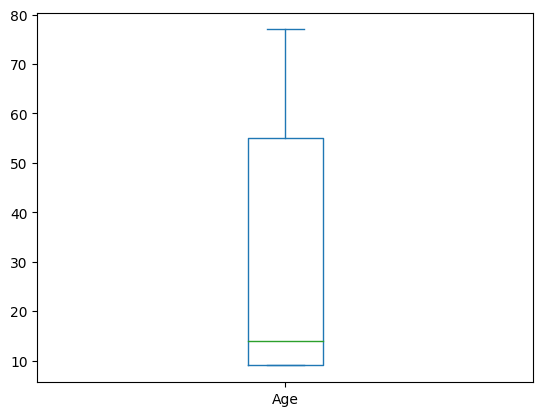

In [ ]:
df['Age'].plot(kind='box')

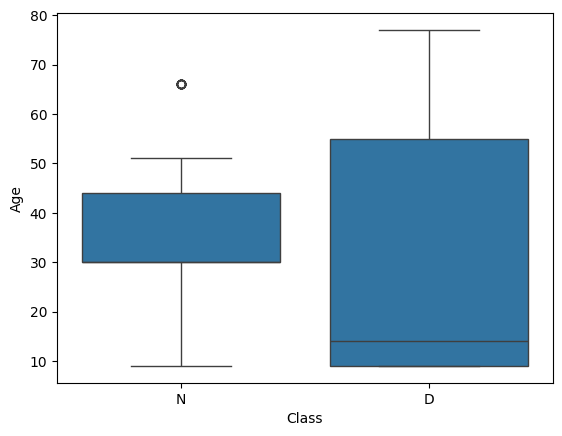

In [ ]:
sns.boxplot(x="Class", y="Age", data=df)
plt.show()

<Axes: >

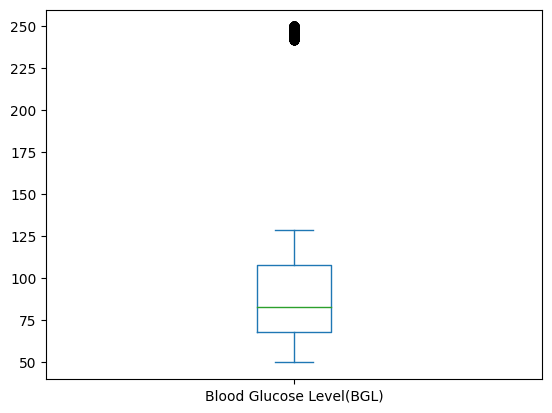

In [ ]:
df['Blood Glucose Level(BGL)'].plot(kind='box')

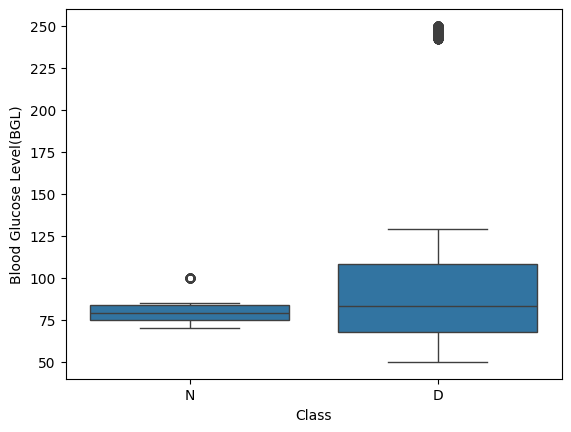

In [ ]:
sns.boxplot(x="Class", y="Blood Glucose Level(BGL)", data=df)
plt.show()

<Axes: >

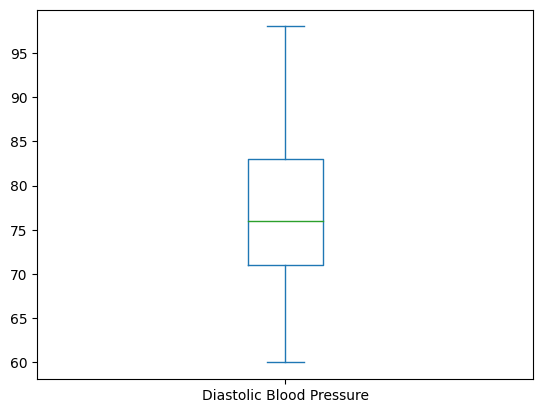

In [ ]:
df['Diastolic Blood Pressure'].plot(kind='box')

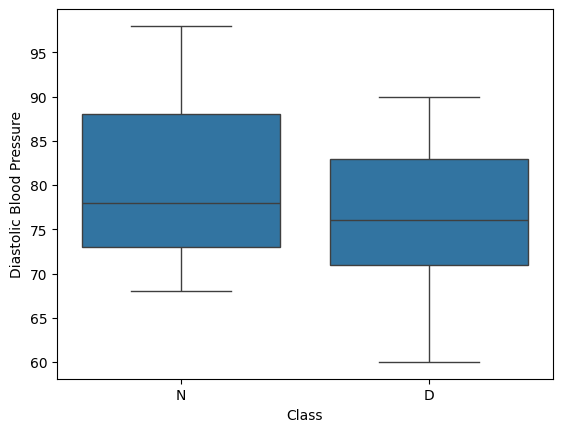

In [ ]:
sns.boxplot(x="Class", y="Diastolic Blood Pressure", data=df)
plt.show()

<Axes: >

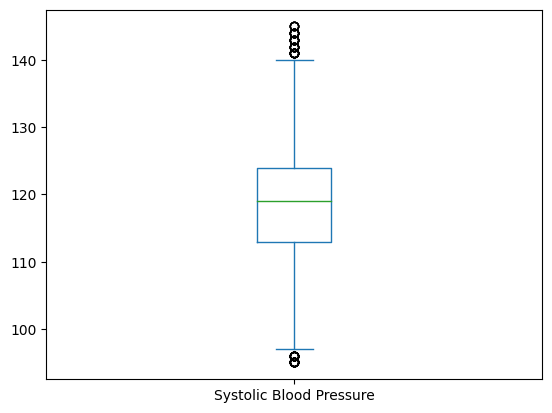

In [ ]:
df['Systolic Blood Pressure'].plot(kind='box')

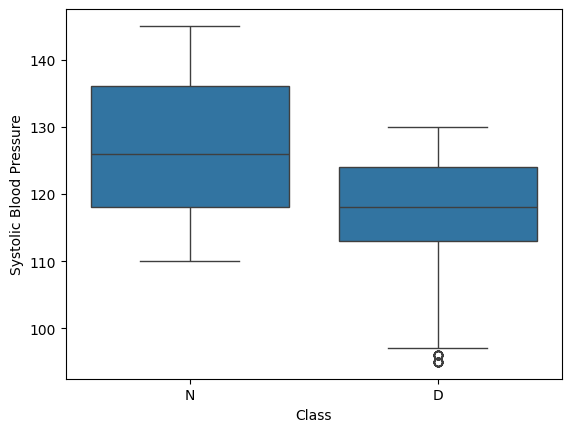

In [ ]:
sns.boxplot(x="Class", y="Systolic Blood Pressure", data=df)
plt.show()

<Axes: >

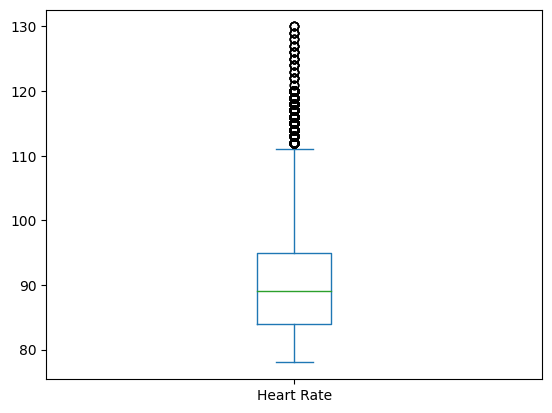

In [ ]:
df['Heart Rate'].plot(kind='box')

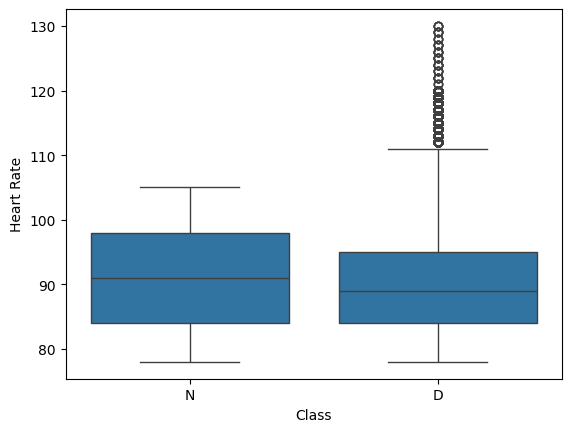

In [ ]:
sns.boxplot(x="Class", y="Heart Rate", data=df)
plt.show()

<Axes: >

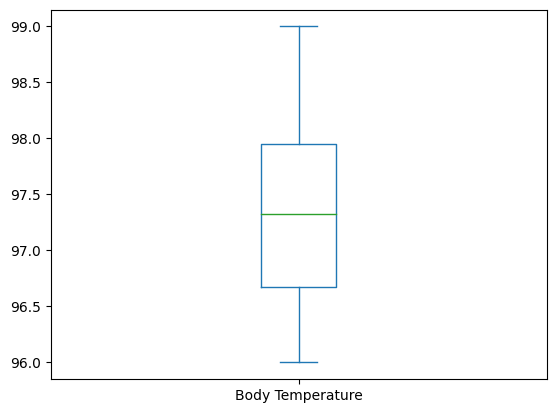

In [ ]:
df['Body Temperature'].plot(kind='box')

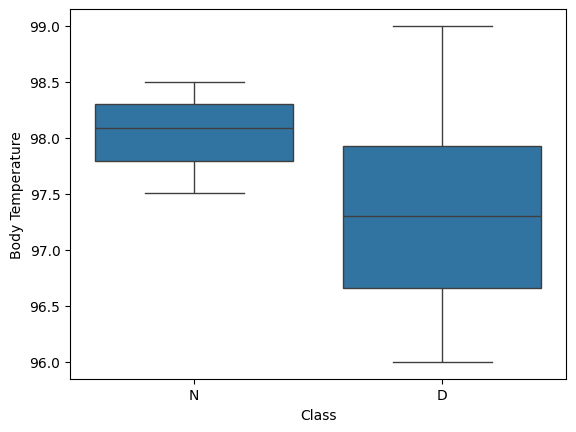

In [ ]:
sns.boxplot(x="Class", y="Body Temperature", data=df)
plt.show()

<Axes: >

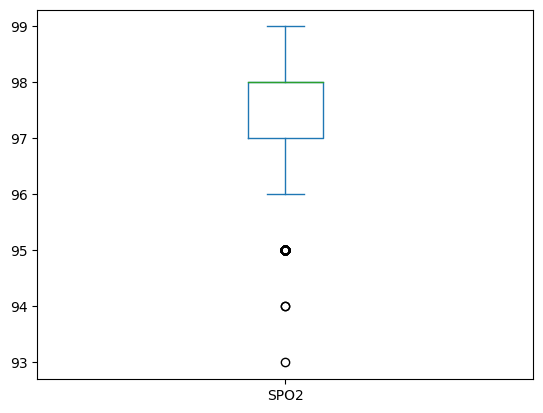

In [ ]:
df['SPO2'].plot(kind='box')

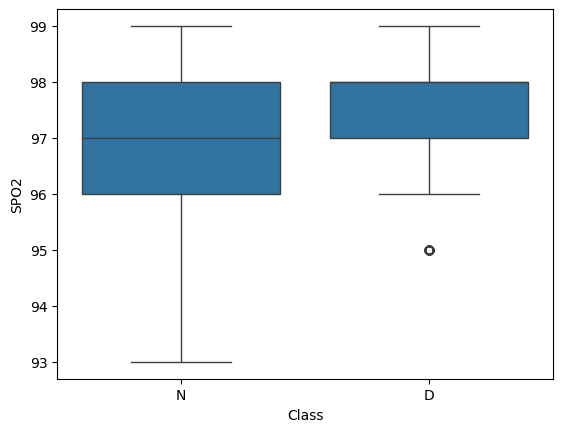

In [ ]:
sns.boxplot(x="Class", y="SPO2", data=df)
plt.show()

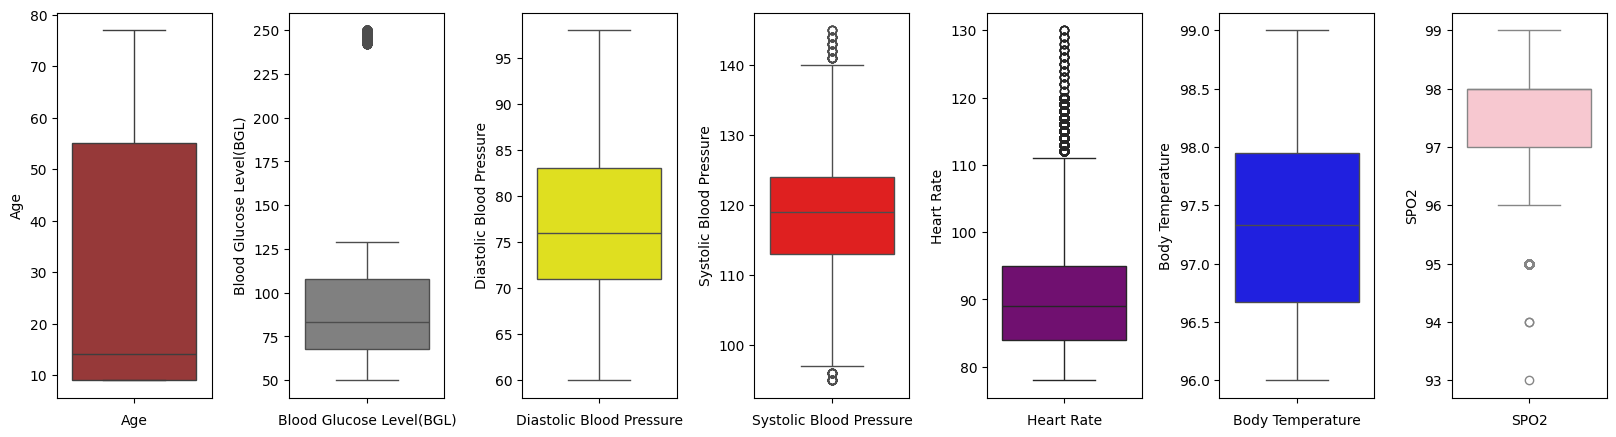

In [ ]:
# initialize figure with 11 subplots in a row
fig, ax = plt.subplots(1, 7, figsize=(20, 5))

# add padding between the subplots
plt.subplots_adjust(wspace=0.5)

# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['Age'], ax=ax[0], color='brown',)
ax[0].set_xlabel('Age')

# draw boxplot for station_distance in the 2nd subplot
sns.boxplot(data=df['Blood Glucose Level(BGL)'], ax=ax[1], color='grey')
ax[1].set_xlabel('Blood Glucose Level(BGL)')

# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['Diastolic Blood Pressure'], ax=ax[2], color='yellow')
ax[2].set_xlabel('Diastolic Blood Pressure')

# draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['Systolic Blood Pressure'], ax=ax[3], color='red')
ax[3].set_xlabel('Systolic Blood Pressure')

# draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['Heart Rate'], ax=ax[4], color='purple')
ax[4].set_xlabel('Heart Rate')

# draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['Body Temperature'], ax=ax[5], color='blue')
ax[5].set_xlabel('Body Temperature')

# draw boxplot for unit_price in the 4th subplot
sns.boxplot(data=df['SPO2'], ax=ax[6], color='pink')
ax[6].set_xlabel('SPO2')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])

In [ ]:
df['Shivering (Y/N)'].value_counts()

Shivering (Y/N)
0    14499
1     2470
Name: count, dtype: int64

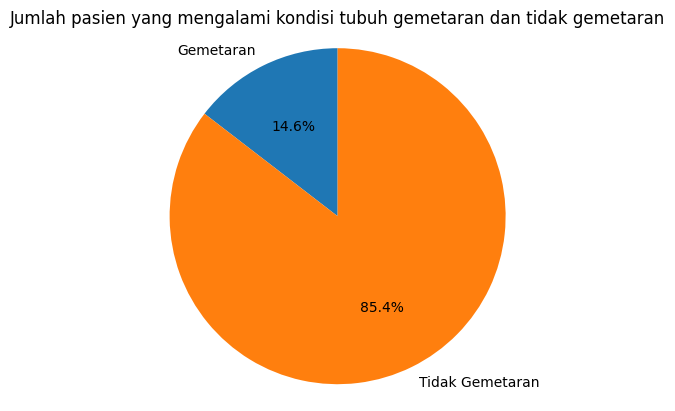

In [ ]:
labels = ['Gemetaran', 'Tidak Gemetaran']
quantity = [2470,14499]

plt.title('Jumlah pasien yang mengalami kondisi tubuh gemetaran dan tidak gemetaran')
plt.pie(quantity, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
df['Class'].value_counts()

Class
D    16641
N      328
Name: count, dtype: int64

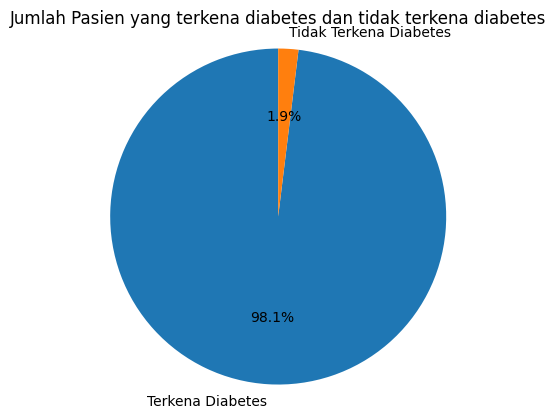

In [ ]:
labels = ['Terkena Diabetes', 'Tidak Terkena Diabetes']
quantity = [16641,328]

plt.title('Jumlah Pasien yang terkena diabetes dan tidak terkena diabetes')
plt.pie(quantity, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

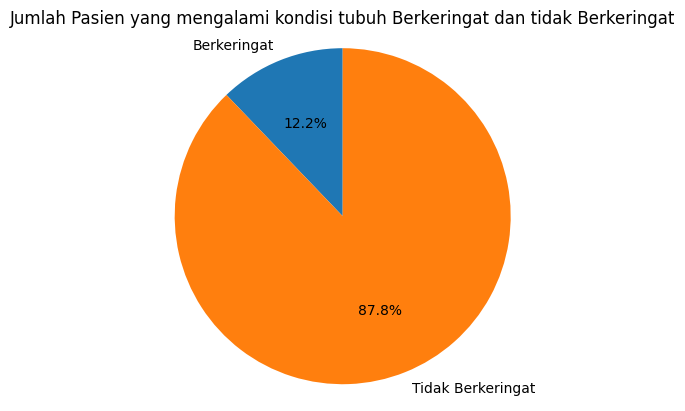

In [ ]:
labels = ['Berkeringat', 'Tidak Berkeringat']
quantity = [2065,14915]

plt.title('Jumlah Pasien yang mengalami kondisi tubuh Berkeringat dan tidak Berkeringat')
plt.pie(quantity, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Data Prepocessing: Missing Values

In [ ]:
identify = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Type Data': df.dtypes})
identify

,Data Kosong,Data Duplikat,Type Data
Age,0,259,int64
Blood Glucose Level(BGL),0,259,int64
Diastolic Blood Pressure,0,259,int64
Systolic Blood Pressure,0,259,int64
Heart Rate,0,259,int64
Body Temperature,0,259,float64
SPO2,0,259,int64
Sweating (Y/N),0,259,int64
Shivering (Y/N),0,259,int64
Class,0,259,object


### Handling Data Duplikat

In [ ]:
# handle duplicate data
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
identify = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Type Data': df.dtypes})
identify

,Data Kosong,Data Duplikat,Type Data
Age,0,0,int64
Blood Glucose Level(BGL),0,0,int64
Diastolic Blood Pressure,0,0,int64
Systolic Blood Pressure,0,0,int64
Heart Rate,0,0,int64
Body Temperature,0,0,float64
SPO2,0,0,int64
Sweating (Y/N),0,0,int64
Shivering (Y/N),0,0,int64
Class,0,0,object


# Transpose Data

In [ ]:
new_data=df.T

In [ ]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,16959,16960,16961,16962,16963,16964,16965,16966,16967,16968
Age,9,9,9,9,66,66,66,66,66,9,...,9,9,9,9,9,9,9,9,9,9
Blood Glucose Level(BGL),79,80,70,70,100,100,100,100,100,80,...,76,75,81,82,78,83,83,73,74,76
Diastolic Blood Pressure,73,73,76,78,96,72,94,77,79,78,...,87,71,84,84,79,87,79,82,86,85
Systolic Blood Pressure,118,119,110,115,144,133,142,140,144,118,...,124,130,110,120,126,127,117,116,128,117
Heart Rate,98,102,81,96,92,89,78,83,87,96,...,80,80,94,95,78,90,80,93,91,79
Body Temperature,98.300707,98.300707,98.300707,98.300707,97.807052,98.351676,97.93941,97.787502,98.288617,98.00789,...,96.04488,98.904977,98.649981,96.271841,97.029604,96.842657,97.869454,96.766282,98.941036,97.570685
SPO2,99,94,98,96,98,96,96,95,97,97,...,98,98,98,98,98,97,98,98,98,97
Sweating (Y/N),0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shivering (Y/N),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Class,N,N,N,N,N,N,N,N,N,N,...,D,D,D,D,D,D,D,D,D,D


### Imbalance Data

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
y_smote.value_counts()

Class
N    16382
D    16382
Name: count, dtype: int64

In [ ]:
df=pd.concat([X_smote, y_smote], axis=1)
df

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N
...,...,...,...,...,...,...,...,...,...,...
32759,9,76,70,119,84,98.285436,93,0,0,N
32760,31,77,79,125,88,97.905879,97,0,0,N
32761,9,72,76,117,78,98.168688,96,0,0,N
32762,30,81,82,141,91,98.020886,98,1,0,N


# Encoding

In [ ]:
df

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N
...,...,...,...,...,...,...,...,...,...,...
32759,9,76,70,119,84,98.285436,93,0,0,N
32760,31,77,79,125,88,97.905879,97,0,0,N
32761,9,72,76,117,78,98.168688,96,0,0,N
32762,30,81,82,141,91,98.020886,98,1,0,N


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Membuat objek OneHotEncoder
onehotencoder = OneHotEncoder()
# Menggunakan OneHotEncoder untuk melakukan encoding pada kolom 'Class'
encoded_data = onehotencoder.fit_transform(df[['Class']])

# Mengonversi matriks sparse menjadi DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=onehotencoder.get_feature_names_out(['Class']))

In [ ]:
encoded_df

,Class_D,Class_N
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
32759,0.0,1.0
32760,0.0,1.0
32761,0.0,1.0
32762,0.0,1.0


In [ ]:
df.reset_index(drop=True, inplace=True)
# Menetapkan ulang indeks pada DataFrame hasil encoding
encoded_df.reset_index(drop=True, inplace=True)

# Menggabungkan hasil encoding ke dalam DataFrame asli
data_baru = pd.concat([df, encoded_df], axis=1)

In [ ]:
data_baru

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class,Class_D,Class_N
0,9,79,73,118,98,98.300707,99,0,0,N,0.0,1.0
1,9,80,73,119,102,98.300707,94,1,0,N,0.0,1.0
2,9,70,76,110,81,98.300707,98,1,0,N,0.0,1.0
3,9,70,78,115,96,98.300707,96,1,0,N,0.0,1.0
4,66,100,96,144,92,97.807052,98,0,0,N,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32759,9,76,70,119,84,98.285436,93,0,0,N,0.0,1.0
32760,31,77,79,125,88,97.905879,97,0,0,N,0.0,1.0
32761,9,72,76,117,78,98.168688,96,0,0,N,0.0,1.0
32762,30,81,82,141,91,98.020886,98,1,0,N,0.0,1.0


In [ ]:
data_baru.drop('Class', axis=1, inplace=True)

In [ ]:
data_baru

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class_D,Class_N
0,9,79,73,118,98,98.300707,99,0,0,0.0,1.0
1,9,80,73,119,102,98.300707,94,1,0,0.0,1.0
2,9,70,76,110,81,98.300707,98,1,0,0.0,1.0
3,9,70,78,115,96,98.300707,96,1,0,0.0,1.0
4,66,100,96,144,92,97.807052,98,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
32759,9,76,70,119,84,98.285436,93,0,0,0.0,1.0
32760,31,77,79,125,88,97.905879,97,0,0,0.0,1.0
32761,9,72,76,117,78,98.168688,96,0,0,0.0,1.0
32762,30,81,82,141,91,98.020886,98,1,0,0.0,1.0


In [ ]:
data_baru.dtypes

Age                                      int64
Blood Glucose Level(BGL)                 int64
Diastolic Blood Pressure                 int64
Systolic Blood Pressure                  int64
Heart Rate                               int64
Body Temperature                       float64
SPO2                                     int64
Sweating  (Y/N)                          int64
Shivering (Y/N)                          int64
Class_D                     Sparse[float64, 0]
Class_N                     Sparse[float64, 0]
dtype: object

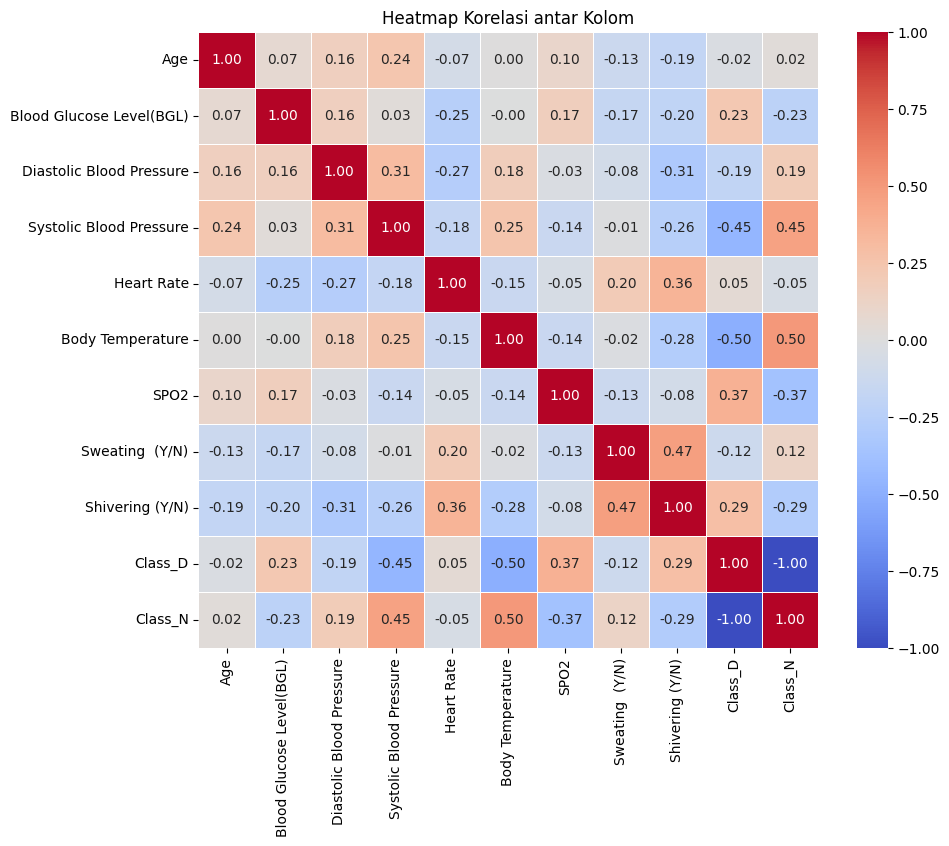

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_baru.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

# Features Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

columns = ['Age']

scaler=RobustScaler()
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Age']=data_scale

columns = ['Blood Glucose Level(BGL)']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Blood Glucose Level(BGL)']=data_scale

columns = ['Diastolic Blood Pressure']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Diastolic Blood Pressure']=data_scale

columns = ['Systolic Blood Pressure']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Systolic Blood Pressure']=data_scale

columns = ['Heart Rate']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Heart Rate']=data_scale

columns = ['Body Temperature']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['Body Temperature']=data_scale

columns = ['SPO2']
data_scale=scaler.fit_transform(data_baru[columns])
data_baru['SPO2']=data_scale

In [ ]:
data_baru

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Class_D,Class_N
0,-0.567568,-0.037037,-0.307692,-0.230769,0.615385,0.488889,1.0,0,0,0.0,1.0
1,-0.567568,0.000000,-0.307692,-0.153846,0.923077,0.488889,-1.5,1,0,0.0,1.0
2,-0.567568,-0.370370,-0.076923,-0.846154,-0.692308,0.488889,0.5,1,0,0.0,1.0
3,-0.567568,-0.370370,0.076923,-0.461538,0.461538,0.488889,-0.5,1,0,0.0,1.0
4,0.972973,0.740741,1.461538,1.769231,0.153846,-0.070339,0.5,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
32759,-0.567568,-0.148148,-0.538462,-0.153846,-0.461538,0.471590,-2.0,0,0,0.0,1.0
32760,0.027027,-0.111111,0.153846,0.307692,-0.153846,0.041616,0.0,0,0,0.0,1.0
32761,-0.567568,-0.296296,-0.076923,-0.307692,-0.923077,0.339334,-0.5,0,0,0.0,1.0
32762,0.000000,0.037037,0.384615,1.538462,0.076923,0.171899,0.5,1,0,0.0,1.0


<Axes: >

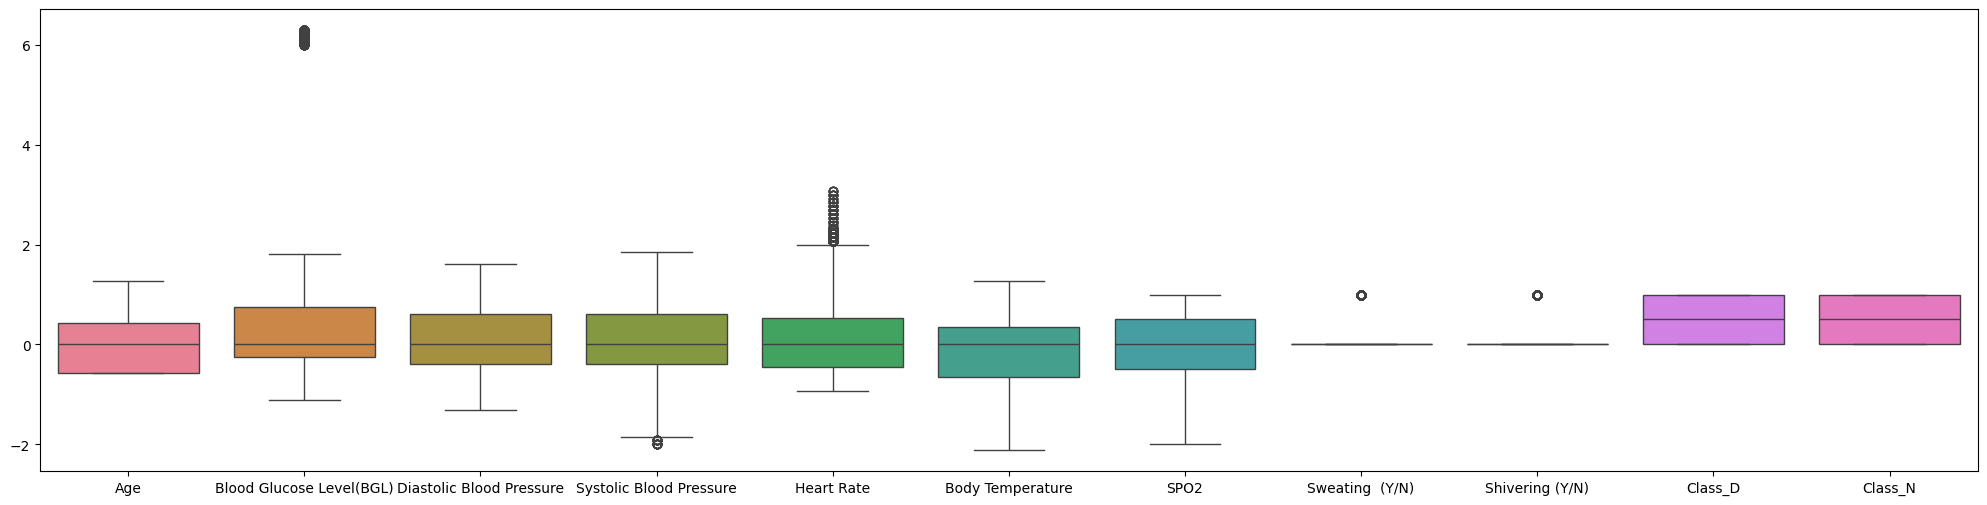

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(data=data_baru)

In [ ]:
data_baru.dtypes

Age                                    float64
Blood Glucose Level(BGL)               float64
Diastolic Blood Pressure               float64
Systolic Blood Pressure                float64
Heart Rate                             float64
Body Temperature                       float64
SPO2                                   float64
Sweating  (Y/N)                          int64
Shivering (Y/N)                          int64
Class_D                     Sparse[float64, 0]
Class_N                     Sparse[float64, 0]
dtype: object

### Slicing Data

In [ ]:
dataslicing = data_baru.iloc[:,[1,3,5]].values
dataslicing = np.asarray(dataslicing)
print(dataslicing)

[[-0.03703704 -0.23076923  0.4888892 ]
 [ 0.         -0.15384615  0.4888892 ]
 [-0.37037037 -0.84615385  0.4888892 ]
 ...
 [-0.2962963  -0.30769231  0.33933447]
 [ 0.03703704  1.53846154  0.17189941]
 [ 0.74074074  1.46153846 -0.16057547]]


## Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

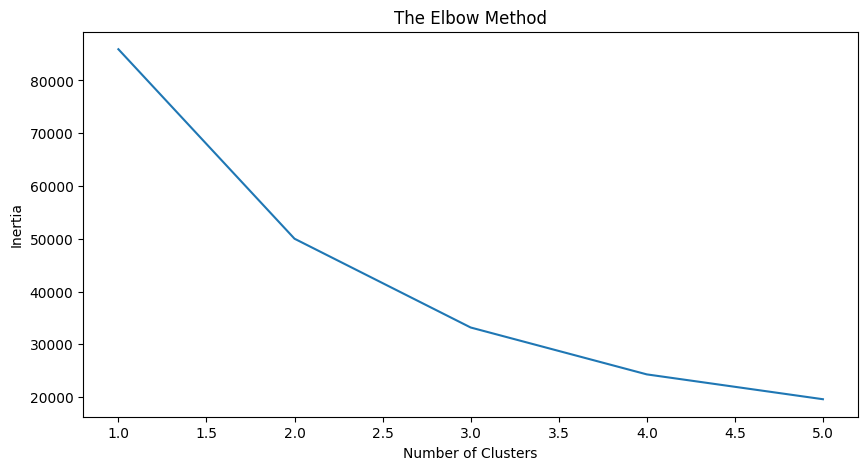

In [ ]:
wcss=[]
for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    label=kmeans.fit_predict(dataslicing)

    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


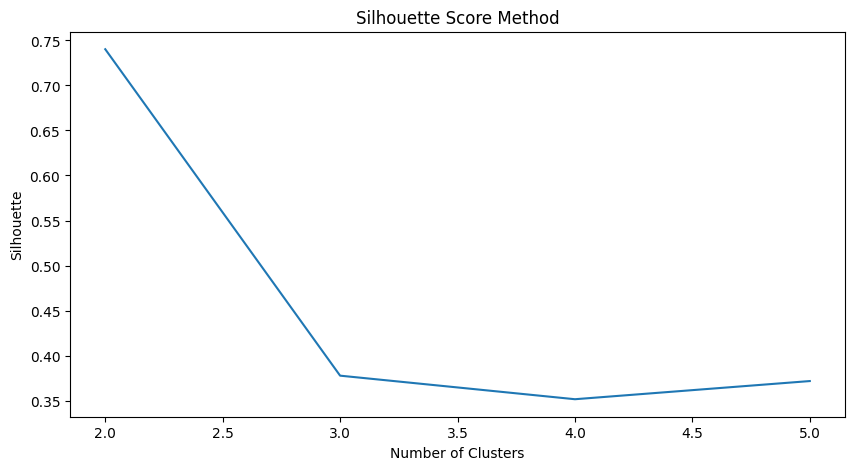

In [ ]:
wcss=[]
for k in range(2,6):
    kmeans = KMeans(n_clusters=k)
    label=kmeans.fit_predict(dataslicing)

    siluet=silhouette_score(dataslicing, label, metric='euclidean')
    wcss.append(siluet)
plt.figure(figsize=(10,5))
plt.plot(range(2,6),wcss)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(dataslicing)

print(pred_y)

[0 0 0 ... 0 0 0]


In [ ]:
print('Silhouette Score:', silhouette_score(dataslicing, pred_y))

Silhouette Score: 0.7402420479800991


In [ ]:
data2 = pd.DataFrame(data_baru, columns=['Blood Glucose Level(BGL)', 'Systolic Blood Pressure', 'Body Temperature'])
data2['Cluster']=pred_y
print(data2)

       Blood Glucose Level(BGL)  Systolic Blood Pressure  Body Temperature  \
0                     -0.037037                -0.230769          0.488889   
1                      0.000000                -0.153846          0.488889   
2                     -0.370370                -0.846154          0.488889   
3                     -0.370370                -0.461538          0.488889   
4                      0.740741                 1.769231         -0.070339   
...                         ...                      ...               ...   
32759                 -0.148148                -0.153846          0.471590   
32760                 -0.111111                 0.307692          0.041616   
32761                 -0.296296                -0.307692          0.339334   
32762                  0.037037                 1.538462          0.171899   
32763                  0.740741                 1.461538         -0.160575   

       Cluster  
0            0  
1            0  
2           

In [ ]:
data2=pd.DataFrame(data2)
data2

,Blood Glucose Level(BGL),Systolic Blood Pressure,Body Temperature,Cluster
0,-0.037037,-0.230769,0.488889,0
1,0.000000,-0.153846,0.488889,0
2,-0.370370,-0.846154,0.488889,0
3,-0.370370,-0.461538,0.488889,0
4,0.740741,1.769231,-0.070339,0
...,...,...,...,...
32759,-0.148148,-0.153846,0.471590,0
32760,-0.111111,0.307692,0.041616,0
32761,-0.296296,-0.307692,0.339334,0
32762,0.037037,1.538462,0.171899,0


In [ ]:
# Memfilter data untuk cluster 0
cluster_0 = data2[data2['Cluster'] == 0]

# Memfilter data untuk cluster 1
cluster_1 = data2[data2['Cluster'] == 1]

# Menampilkan data cluster 0 dan cluster 1
print("Data untuk Cluster 0:")
print(cluster_0.head())  # Menampilkan beberapa baris pertama dari cluster 0

print("\nData untuk Cluster 1:")
print(cluster_1.head())  # Menampilkan beberapa baris pertama dari cluster 1

Data untuk Cluster 0:
   Blood Glucose Level(BGL)  Systolic Blood Pressure  Body Temperature  \
0                 -0.037037                -0.230769          0.488889   
1                  0.000000                -0.153846          0.488889   
2                 -0.370370                -0.846154          0.488889   
3                 -0.370370                -0.461538          0.488889   
4                  0.740741                 1.769231         -0.070339   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

Data untuk Cluster 1:
       Blood Glucose Level(BGL)  Systolic Blood Pressure  Body Temperature  \
13706                       6.0                 0.230769         -1.782612   
13707                       6.0                 0.307692          0.715661   
13708                       6.0                -0.692308          0.796118   
13709                       6.0                -0.615385         -0.995455   
13710                       6.0           

In [ ]:
cluster0=pd.DataFrame(cluster_0.head(10))
cluster0

,Blood Glucose Level(BGL),Systolic Blood Pressure,Body Temperature,Cluster
0,-0.037037,-0.230769,0.488889,0
1,0.000000,-0.153846,0.488889,0
2,-0.370370,-0.846154,0.488889,0
3,-0.370370,-0.461538,0.488889,0
4,0.740741,1.769231,-0.070339,0
5,0.740741,0.923077,0.546629,0
6,0.740741,1.615385,0.079600,0
7,0.740741,1.461538,-0.092486,0
8,0.740741,1.769231,0.475194,0
9,0.000000,-0.230769,0.157176,0


In [ ]:
cluster1=pd.DataFrame(cluster_1.head(10))
cluster1

,Blood Glucose Level(BGL),Systolic Blood Pressure,Body Temperature,Cluster
13706,6.0,0.230769,-1.782612,1
13707,6.0,0.307692,0.715661,1
13708,6.0,-0.692308,0.796118,1
13709,6.0,-0.615385,-0.995455,1
13710,6.0,0.538462,0.608756,1
13711,6.0,0.307692,0.656522,1
13712,6.0,-0.692308,-1.117267,1
13713,6.0,-0.538462,-0.868680,1
13714,6.0,0.307692,0.077494,1
13715,6.0,-0.769231,-2.038144,1


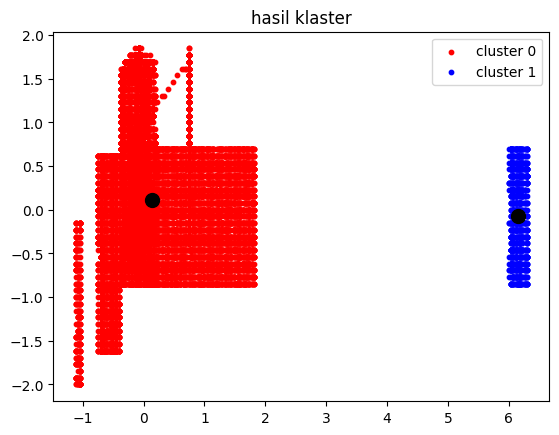

In [ ]:
plt.scatter(dataslicing[pred_y==0,0],dataslicing[pred_y==0,1],
            s=10,c='red',label='cluster 0')
plt.scatter(dataslicing[pred_y==1,0],dataslicing[pred_y==1,1],
            s=10,c='blue',label='cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=100, c="black")
plt.title("hasil klaster")
plt.legend()
plt.show()

### Splitting Data

In [ ]:
# Mengubah tipe data kolom 'Class_D' dan 'Class_N' menjadi integer
data_baru['Class_D'] = data_baru['Class_D'].to_numpy(dtype='int64')
data_baru['Class_N'] = data_baru['Class_N'].to_numpy(dtype='int64')

X = data_baru.drop(columns=['Class_D', 'Class_N'])
y = data_baru[['Class_D', 'Class_N']]

y.value_counts()

Class_D  Class_N
0        1          16382
1        0          16382
Name: count, dtype: int64

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, random_state=0)

In [ ]:
print('Persentase target di training:')
print(y_train.value_counts(normalize=True))
print('Persentase target di validation:')
print(y_val.value_counts(normalize=True))
print('Persentase target di testing:')
print(y_test.value_counts(normalize=True))

Persentase target di training:
Class_D  Class_N
1        0          0.500603
0        1          0.499397
Name: proportion, dtype: float64
Persentase target di validation:
Class_D  Class_N
0        1          0.500509
1        0          0.499491
Name: proportion, dtype: float64
Persentase target di testing:
Class_D  Class_N
0        1          0.504425
1        0          0.495575
Name: proportion, dtype: float64


In [ ]:
print("Jumlah data training:", len(x_train))
print("Jumlah data validasi:", len(x_val))
print("Jumlah data test:", len(x_test))

Jumlah data training: 26538
Jumlah data validasi: 2949
Jumlah data test: 3277


### Klasifikasi

### Membangun Model Klasifikasi dengan Machine Learning (Random Forest)

In [ ]:
# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data training
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluasi pada data validation
y_val_pred = rf_classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluasi pada data test
y_test_pred = rf_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Validation Accuracy: 0.9986436080027128
Test Accuracy: 0.9978638999084528


In [ ]:
# Jika y_test adalah one-hot encoded, ubah ke label tunggal
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_test_pred, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Hitung metrik lainnya
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[1617    7]
 [   0 1653]]
Accuracy: 0.9978638999084528
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       1.00      1.00      1.00      1653

    accuracy                           1.00      3277
   macro avg       1.00      1.00      1.00      3277
weighted avg       1.00      1.00      1.00      3277



### Membangun klasifikasi model dengan ANN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

scce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 58,562
Trainable params: 58,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
415/415 [==============================] - 2s 4ms/step - loss: 0.0995 - accuracy: 0.9593 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 2/20
415/415 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9884 - val_loss: 0.0311 - val_accuracy: 0.9902
Epoch 3/20
415/415 [==============================] - 2s 5ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0202 - val_accuracy: 0.9936
Epoch 4/20
415/415 [==============================] - 2s 5ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0159 - val_accuracy: 0.9959
Epoch 5/20
415/415 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0235 - val_accuracy: 0.9936
Epoch 6/20
415/415 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0162 - val_accuracy: 0.9963
Epoch 7/20
415/415 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0269 - val_accuracy: 0.9919
Epoch 

In [ ]:
evaluation = model.evaluate(x_test, y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9973


In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred

103/103 [==============================] - 1s 4ms/step


array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test = np.argmax(y_test,axis=1)
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1610,   14],
       [   0, 1653]])

#### Tuning Model ANN

In [ ]:
#Mendefinisikan Model ANN
def get_model_ann(batch_size, learning_rate, units, activation):
    model = Sequential()
    model.add(Dense(units = units, activation = activation, input_shape=(x_train.shape[1],)))
    model.add(Dense(units = units, activation = activation))
    model.add(Dense(2, activation='sigmoid'))

    # Compile model
    model.compile(loss='BinaryCrossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

    # Early Stoping
    early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[early_stopping])
    return model

In [ ]:
#Mendefinisikan Model
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [32, 64],
             'learning_rate':[0.01, 0.001],
             'units':[16, 32, 64],
             'activation':['relu', 'tanh']}

<ipython-input-44-30a78a834381>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_ann = KerasClassifier(build_fn=get_model_ann)


In [ ]:
ann = GridSearchCV(model_ann, param_grid=params_ann)

history = ann.fit(x_train, y_train)

Output streaming akan dipotong hingga 5000 baris terakhir.
Epoch 8/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0386 - val_accuracy: 0.9866
Epoch 9/100
415/415 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 10/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 11/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0310 - val_accuracy: 0.9924
Epoch 12/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0267 - val_accuracy: 0.9905
Epoch 13/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 14/100
415/415 [==============================] - 2s 4ms/step - loss: 0.0

In [ ]:
print("\n Parameter Terbaik  {}".format(history.best_params_))


 Parameter Terbaik  {'activation': 'tanh', 'batch_size': 32, 'learning_rate': 0.001, 'units': 64}


In [ ]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history.best_score_, history.best_params_))
means = history.cv_results_['mean_test_score']
stds = history.cv_results_['std_test_score']
params = history.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model = history.best_estimator_.model

Best: 0.998681 using {'activation': 'tanh', 'batch_size': 32, 'learning_rate': 0.001, 'units': 64}
0.994951 (0.000986) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.01, 'units': 16}
0.995855 (0.001099) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.01, 'units': 32}
0.995478 (0.001250) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.01, 'units': 64}
0.993556 (0.003116) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.001, 'units': 16}
0.996345 (0.001382) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.001, 'units': 32}
0.996156 (0.001584) with: {'activation': 'relu', 'batch_size': 32, 'learning_rate': 0.001, 'units': 64}
0.994724 (0.002419) with: {'activation': 'relu', 'batch_size': 64, 'learning_rate': 0.01, 'units': 16}
0.995742 (0.000965) with: {'activation': 'relu', 'batch_size': 64, 'learning_rate': 0.01, 'units': 32}
0.996006 (0.001291) with: {'activation': 'relu', 'batch_size': 64, 'learni

#### Membangun model berdasarkan parameter tuning

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(9,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])

scce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
830/830 [==============================] - 4s 4ms/step - loss: 0.2792 - accuracy: 0.8763 - val_loss: 0.1890 - val_accuracy: 0.9255
Epoch 2/100
830/830 [==============================] - 2s 2ms/step - loss: 0.1439 - accuracy: 0.9427 - val_loss: 0.1076 - val_accuracy: 0.9609
Epoch 3/100
830/830 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9674 - val_loss: 0.0818 - val_accuracy: 0.9698
Epoch 4/100
830/830 [==============================] - 2s 2ms/step - loss: 0.0693 - accuracy: 0.9749 - val_loss: 0.0691 - val_accuracy: 0.9725
Epoch 5/100
830/830 [==============================] - 2s 3ms/step - loss: 0.0547 - accuracy: 0.9812 - val_loss: 0.0531 - val_accuracy: 0.9805
Epoch 6/100
830/830 [==============================] - 2s 3ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 7/100
830/830 [==============================] - 2s 2ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0339 - val_accuracy: 0.9890

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

103/103 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9982
Accuracy: 99.82%


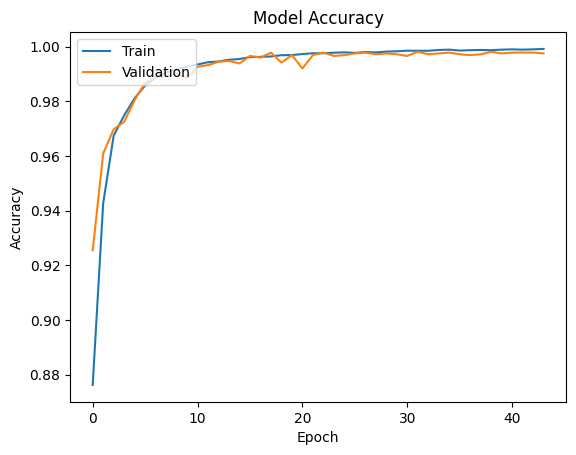

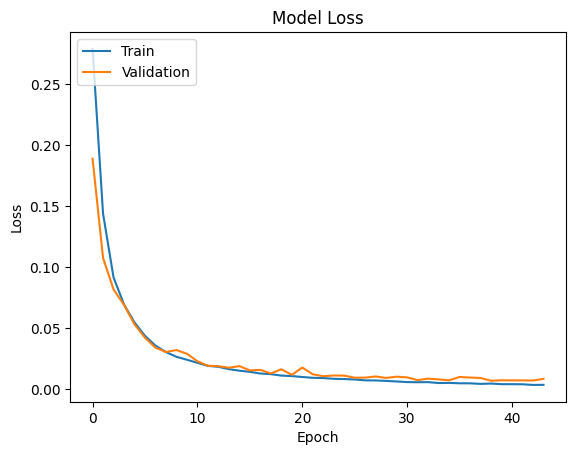

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred

103/103 [==============================] - 0s 2ms/step


array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test = np.argmax(y_test,axis=1)
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1618,    6],
       [   0, 1653]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       1.00      1.00      1.00      1653

    accuracy                           1.00      3277
   macro avg       1.00      1.00      1.00      3277
weighted avg       1.00      1.00      1.00      3277



Text(0.5, 1.0, 'Confusion Matrix Model')

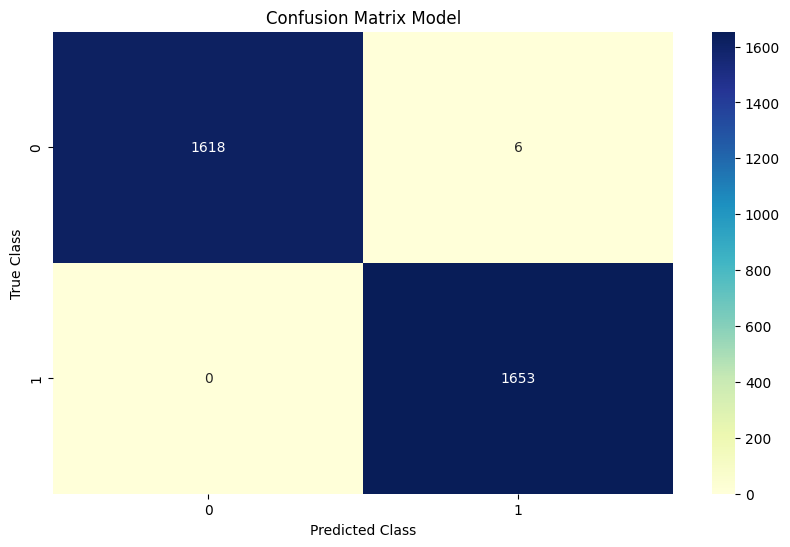

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [ ]:
input_data=(9,	80,	73,	119,	102,	98.300707,	94,	1,	0)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshape)
print(std_data)
prediction = model.predict(std_data)
print("Model prediction (probabilities):", prediction)

# Gunakan np.argmax untuk mendapatkan indeks kelas prediksi
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)

if predicted_class[0] == 0:
    print('Pasien tidak terkena resiko diabetes')
else:
    print('Pasien terkena resiko diabetes')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


[[  9.          80.          73.         119.         102.
   97.98442392  94.           1.           0.        ]]
1/1 [==============================] - 0s 104ms/step
Model prediction (probabilities): [[0.9980071  0.00199295]]
Predicted class: [0]
Pasien tidak terkena resiko diabetes


### Simpan model

In [89]:
import pickle

In [90]:
filename='diabetes_model.sav'
pickle.dump(model,open(filename,'wb'))